In [1]:
import numpy as np

from keras.datasets import fashion_mnist as mnist

from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout, Activation
from keras.utils import to_categorical

from tqdm import tqdm_notebook

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Using TensorFlow backend.
/Users/tentenich/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train =  x_train / 255.0
x_test = x_test / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

In [5]:
model.compile('adam', 'categorical_crossentropy', metrics=['accuracy'])

In [6]:
model.fit(x_train, y_train, 
          batch_size=64, epochs=10,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 32s 527us/step - loss: 0.5041 - acc: 0.8181 - val_loss: 0.4024 - val_acc: 0.8570
Epoch 2/10
60000/60000 [==============================] - 35s 580us/step - loss: 0.3860 - acc: 0.8595 - val_loss: 0.3968 - val_acc: 0.8547
Epoch 3/10
60000/60000 [==============================] - 33s 549us/step - loss: 0.3555 - acc: 0.8697 - val_loss: 0.3530 - val_acc: 0.8757
Epoch 4/10
60000/60000 [==============================] - 32s 527us/step - loss: 0.3319 - acc: 0.8775 - val_loss: 0.3495 - val_acc: 0.8737
Epoch 5/10
60000/60000 [==============================] - 35s 583us/step - loss: 0.3158 - acc: 0.8820 - val_loss: 0.3468 - val_acc: 0.8736
Epoch 6/10
60000/60000 [==============================] - 29s 481us/step - loss: 0.3032 - acc: 0.8879 - val_loss: 0.3408 - val_acc: 0.8753
Epoch 7/10
60000/60000 [==============================] - 27s 457us/step - loss: 0.2931 - acc: 0.8902 - val_loss: 0.

In [7]:
model.evaluate(x_test, y_test, verbose=0)

[0.32795431255102159, 0.88049999999999995]

In [8]:
target = model.layers[1].get_weights()
u, s, v_t = np.linalg.svd(target[0], full_matrices=False)
result = []
for k in range(10):
    tmp_s = s.copy()
    tmp_s[2 ** k:] = 0
    new_weight = u @ np.diag(tmp_s) @ v_t
    
    model.layers[1].set_weights([new_weight, target[1]])
    
    result.append(model.evaluate(x_test, y_test, verbose=0))
model.layers[1].set_weights(target)

In [9]:
result_baseline = []
for k in tqdm_notebook(range(10)):
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    model.add(Dense(2 ** k, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10))
    model.add(Activation('softmax'))
    model.compile('adam', 'categorical_crossentropy', metrics=['accuracy'])
    
    model.fit(x_train, y_train, 
          batch_size=64, epochs=10,
          validation_data=(x_test, y_test), verbose=0)
    
    result_baseline.append(model.evaluate(x_test, y_test, verbose=0))

HBox(children=(IntProgress(value=0, max=10), HTML(value='')))

Text(0.5,0,'log layer output size')

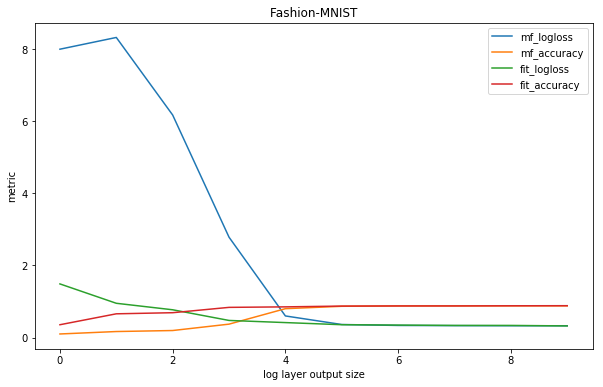

In [10]:
plt.figure(figsize=(10, 6))
plt.title('Fashion-MNIST')
plt.plot(result)
plt.plot(result_baseline)
plt.legend(['mf_logloss', 'mf_accuracy', 'fit_logloss', 'fit_accuracy'])
plt.ylabel('metric')
plt.xlabel('log layer output size')